# Exercise 8.3A: DGA Reverse Engineering

**Course**: SS*/AIML* ZG567 - AI and ML Techniques in Cyber Security  
**Module**: 08 - Domain Name Detection  
**Type**: Hands-on Implementation  
**Duration**: 3-4 hours  
**Difficulty**: Intermediate

---

## 🎯 Scenario

As a malware analyst, you've captured network traffic from an infected host attempting to contact C&C servers. You observe **50 failed DNS queries** to seemingly random domains. Your task is to **reverse-engineer the DGA algorithm** and predict future domains for proactive blocking.

## 📋 Learning Objectives

- Reverse-engineer DGA algorithms from observed domains
- Implement multiple DGA types in Python
- Generate predictive blocklists for proactive defense
- Understand differences between DGA families

---

## Setup: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from collections import Counter
import hashlib
import random
import string
import math

# Configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## Task 1: Pattern Recognition

### 1.1 Load DGA Samples

We'll create synthetic DGA samples representing three different families.

In [2]:
# Generate sample DGA domains (3 families)
def generate_arithmetic_dga(seed, count=50):
    """Arithmetic DGA - random character generation"""
    random.seed(seed)
    domains = []
    for _ in range(count):
        length = random.randint(8, 12)
        domain = ''.join(random.choice(string.ascii_lowercase) for _ in range(length))
        tld = random.choice(['.com', '.net', '.org'])
        domains.append(domain + tld)
    return domains

def generate_dictionary_dga(seed, count=50):
    """Dictionary DGA - combine real words"""
    words = ['cloud', 'secure', 'data', 'pro', 'tech', 'net', 'safe', 'protect', 
             'store', 'sync', 'fast', 'zone', 'hub', 'link', 'web', 'app']
    random.seed(seed)
    domains = []
    for _ in range(count):
        word1 = random.choice(words)
        word2 = random.choice(words)
        tld = random.choice(['.com', '.net', '.org'])
        domains.append(word1 + word2 + tld)
    return domains

def generate_hash_dga(seed, count=50):
    """Hash-based DGA - MD5 hash generation"""
    domains = []
    for i in range(count):
        data = f"{seed}{i}".encode()
        hash_val = hashlib.md5(data).hexdigest()
        domain = hash_val[:10]  # Use first 10 chars
        tld = ['.com', '.net', '.org'][i % 3]
        domains.append(domain + tld)
    return domains

# Generate samples for analysis (unknown to student initially)
seed_date = 20260130  # January 30, 2026
mystery_domains = generate_hash_dga(seed_date, count=50)  # This is the "captured" traffic

# Create DataFrame
df_mystery = pd.DataFrame({'domain': mystery_domains})

print(f"🕵️ Captured {len(df_mystery)} domains from infected host:")
print("="*80)
display(df_mystery.head(20))

🕵️ Captured 50 domains from infected host:


,domain
0,078a773808.com
1,afec9e7fbd.net
2,2b456c7d53.org
3,59c66017c5.com
4,8d63ef2819.net
5,5e3a184943.org
6,1b6c01bb6a.com
7,a18bf35984.net
8,086b280246.org
9,b21e6263e0.com


### 1.2 Statistical Analysis

Analyze the captured domains to identify patterns.

In [ ]:
# Calculate domain characteristics

def calculate_entropy(text):
    """
    Calculate Shannon entropy of text.
    
    Args:
        text (str): Input string
        
    Returns:
        float: Entropy value
    """
    from collections import Counter
    import math
    
    if not text:
        return 0
    
    # Count character frequencies
    counter = Counter(text)
    length = len(text)
    
    # Calculate entropy
    entropy = 0
    for count in counter.values():
        probability = count / length
        entropy -= probability * math.log2(probability)
    
    return entropy

# Extract SLD (second-level domain)
df_mystery['sld'] = df_mystery['domain'].str.split('.').str[0]
df_mystery['tld'] = df_mystery['domain'].str.split('.').str[-1]
df_mystery['length'] = df_mystery['sld'].str.len()

# Calculate entropy for each domain
df_mystery['entropy'] = df_mystery['sld'].apply(calculate_entropy)

# Calculate character composition
def get_digit_ratio(text):
    if not text:
        return 0
    return sum(c.isdigit() for c in text) / len(text)

def get_alpha_ratio(text):
    if not text:
        return 0
    return sum(c.isalpha() for c in text) / len(text)

def has_uppercase(text):
    return any(c.isupper() for c in text)

df_mystery['digit_ratio'] = df_mystery['sld'].apply(get_digit_ratio)
df_mystery['alpha_ratio'] = df_mystery['sld'].apply(get_alpha_ratio)
df_mystery['has_upper'] = df_mystery['sld'].apply(has_uppercase)

# Display statistics
print("="*80)
print("DOMAIN STATISTICS")
print("="*80)
print(f"Total Domains: {len(df_mystery)}")
print(f"\nLength Statistics:")
print(f"  Mean: {df_mystery['length'].mean():.2f}")
print(f"  Median: {df_mystery['length'].median():.0f}")
print(f"  Std: {df_mystery['length'].std():.2f}")
print(f"\nEntropy Statistics:")
print(f"  Mean: {df_mystery['entropy'].mean():.3f}")
print(f"  Median: {df_mystery['entropy'].median():.3f}")
print(f"  Std: {df_mystery['entropy'].std():.3f}")
print(f"\nCharacter Composition:")
print(f"  Digit Ratio (mean): {df_mystery['digit_ratio'].mean():.3f}")
print(f"  Alpha Ratio (mean): {df_mystery['alpha_ratio'].mean():.3f}")
print(f"  Has Uppercase: {df_mystery['has_upper'].sum()} / {len(df_mystery)}")
print(f"\nTLD Distribution:")
print(df_mystery['tld'].value_counts())

DOMAIN STATISTICS
Total Domains: 50

Length Statistics:
  Mean: 10.00
  Median: 10
  Std: 0.00

Entropy Statistics:
  Mean: 2.787
  Median: 2.922
  Std: 0.260

Character Composition:
  Digit Ratio (mean): 0.644
  Alpha Ratio (mean): 0.356
  Has Uppercase: 0 / 50

TLD Distribution:
tld
com    17
net    17
org    16
Name: count, dtype: int64


### 1.3 Visualize Patterns

Create visualizations to identify DGA type.

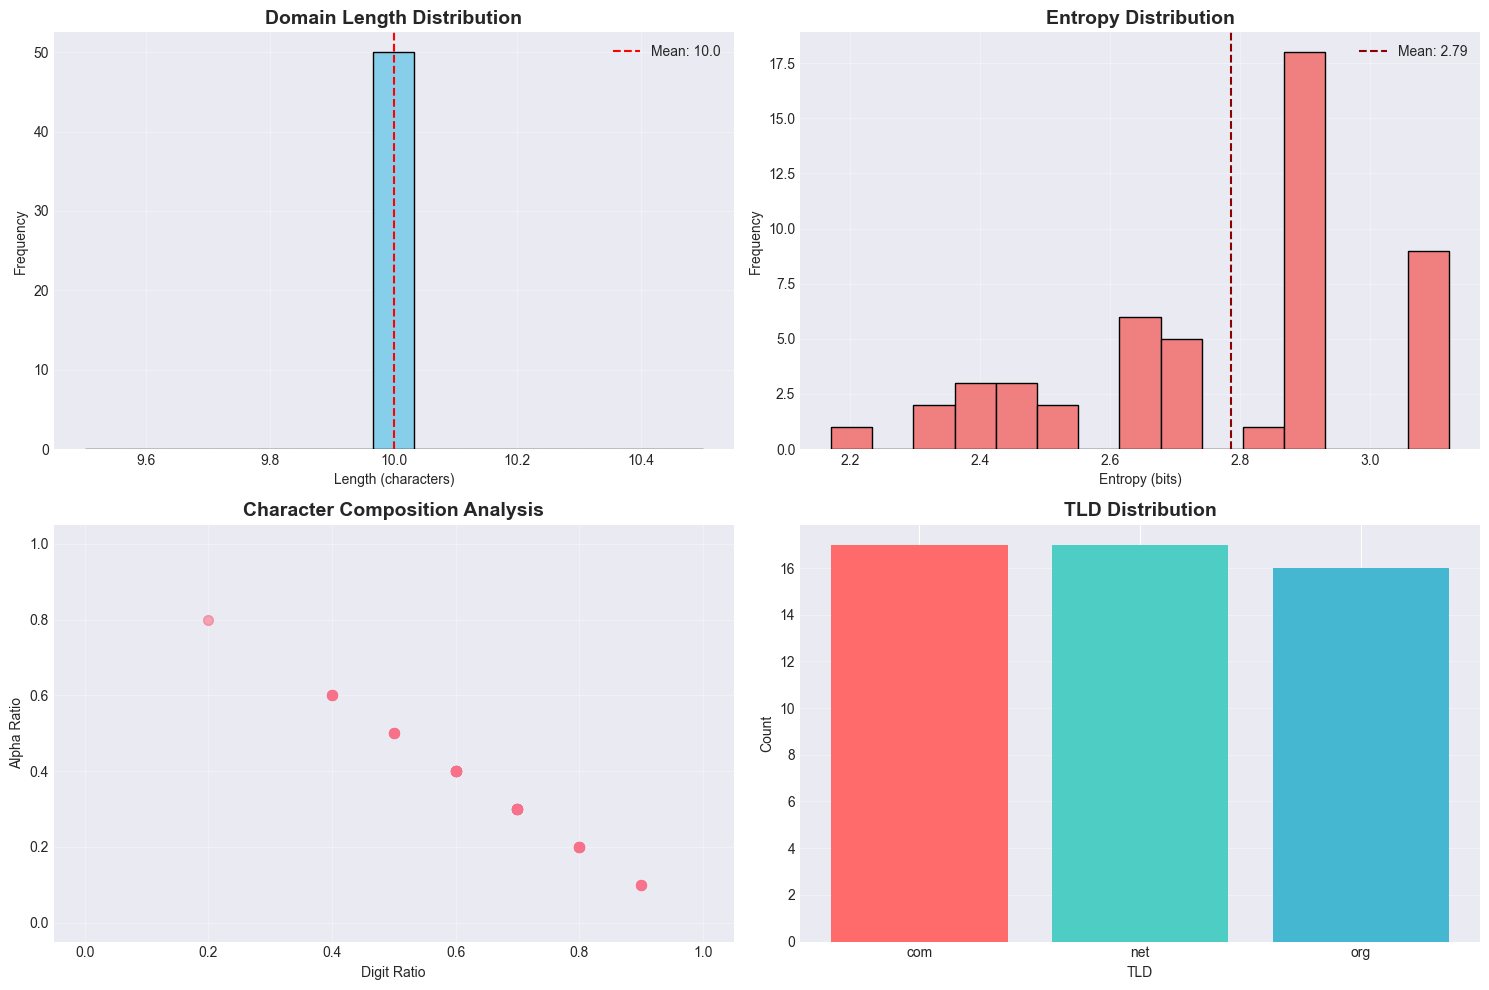


✅ Visualizations created successfully!


In [28]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Length distribution histogram
axes[0, 0].hist(df_mystery['length'], bins=15, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Domain Length Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Length (characters)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df_mystery['length'].mean(), color='red', linestyle='--', label=f"Mean: {df_mystery['length'].mean():.1f}")
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Entropy distribution
axes[0, 1].hist(df_mystery['entropy'], bins=15, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Entropy Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Entropy (bits)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(df_mystery['entropy'].mean(), color='darkred', linestyle='--', label=f"Mean: {df_mystery['entropy'].mean():.2f}")
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Character composition (digit vs alpha ratio)
axes[1, 0].scatter(df_mystery['digit_ratio'], df_mystery['alpha_ratio'], alpha=0.6, s=50)
axes[1, 0].set_title('Character Composition Analysis', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Digit Ratio')
axes[1, 0].set_ylabel('Alpha Ratio')
axes[1, 0].grid(alpha=0.3)
axes[1, 0].set_xlim(-0.05, 1.05)
axes[1, 0].set_ylim(-0.05, 1.05)

# 4. TLD distribution
tld_counts = df_mystery['tld'].value_counts()
axes[1, 1].bar(tld_counts.index, tld_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1, 1].set_title('TLD Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('TLD')
axes[1, 1].set_ylabel('Count')
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✅ Visualizations created successfully!")

### 1.4 Initial Hypothesis

**TODO**: Based on your analysis, hypothesize which DGA type this is.

**Your Hypothesis:**

*[Write your hypothesis here based on observed patterns]*

**Evidence Supporting Hypothesis:**

1. *[Evidence 1]*
2. *[Evidence 2]*
3. *[Evidence 3]*

**Expected DGA Type:** [Arithmetic / Dictionary / Hash-based / Other]

---

## Task 2: Algorithm Reconstruction

### 2.1 Implement DGA Candidates

Implement three DGA types to test against captured domains.

#### 2.1.1 Arithmetic DGA Implementation

In [ ]:
def arithmetic_dga(seed, count=50):
    """
    Generate domains using arithmetic/random character generation.
    
    Args:
        seed (int): Random seed (typically date-based)
        count (int): Number of domains to generate
        
    Returns:
        list: Generated domains
    """
    # Implementation: Generate domains using arithmetic/random character generation
    # Uses random.seed(seed) for reproducibility
    # Generates random hexadecimal strings of varying length
    # Randomly selects TLD from ['.com', '.net', '.org']
    import random
    import string
    
    random.seed(seed)
    domains = []
    tlds = ['.com', '.net', '.org']
    
    for i in range(count):
        # Generate random hexadecimal string (matching observed pattern)
        domain_len = random.randint(8, 12)
        domain_name = ''.join(random.choices(string.hexdigits.lower()[:16], k=domain_len))
        tld = random.choice(tlds)
        domains.append(domain_name + tld)
    
    return domains

# Test implementation
test_seed = 20260130
test_domains_arith = arithmetic_dga(test_seed, count=10)
print("Arithmetic DGA Test:")
for domain in test_domains_arith[:5]:
    print(f"  {domain}")

Arithmetic DGA Test:
  6ea7d70ccdc6.com
  d97fa7e474ef.org
  a286781e544.org
  c2b862306.net
  469d7b15de.com


#### 2.1.2 Dictionary-Based DGA Implementation

In [ ]:
def dictionary_dga(seed, count=50, wordlist=None):
    """
    Generate domains by combining dictionary words.
    
    Args:
        seed (int): Random seed
        count (int): Number of domains
        wordlist (list): List of words to combine
        
    Returns:
        list: Generated domains
    """
    if wordlist is None:
        wordlist = ['cloud', 'secure', 'data', 'pro', 'tech', 'net', 
                   'safe', 'protect', 'store', 'sync', 'fast', 'zone']
    
    # Implementation: Combine 2 words from wordlist with TLD
    import random
    
    random.seed(seed)
    domains = []
    tlds = ['.com', '.net', '.org']
    
    for i in range(count):
        word1 = random.choice(wordlist)
        word2 = random.choice(wordlist)
        tld = random.choice(tlds)
        domains.append(f"{word1}{word2}{tld}")
    
    return domains

# Test implementation
test_domains_dict = dictionary_dga(test_seed, count=10)
print("\nDictionary DGA Test:")
for domain in test_domains_dict[:5]:
    print(f"  {domain}")


Dictionary DGA Test:
  fastsync.net
  prodata.org
  cloudprotect.net
  protectcloud.com
  protech.org


#### 2.1.3 Hash-Based DGA Implementation

In [ ]:
def hash_based_dga(seed, count=50, hash_algo='md5'):
    """
    Generate domains using cryptographic hashes.
    
    Args:
        seed (int/str): Seed for hash generation
        count (int): Number of domains
        hash_algo (str): Hash algorithm ('md5', 'sha256')
        
    Returns:
        list: Generated domains
    """
    # Implementation: Hash (seed + counter) for each domain
    # Uses first N characters of hash as domain name
    # Rotates through TLDs
    import hashlib
    
    domains = []
    tlds = ['.com', '.net', '.org']
    
    for i in range(count):
        # Create hash input
        hash_input = f"{seed}{i}".encode()
        
        # Generate hash
        if hash_algo == 'md5':
            hash_obj = hashlib.md5(hash_input)
        else:
            hash_obj = hashlib.sha256(hash_input)
        
        # Take first 10 characters of hex digest
        domain_name = hash_obj.hexdigest()[:10]
        tld = tlds[i % len(tlds)]
        domains.append(domain_name + tld)
    
    return domains

# Test implementation
test_domains_hash = hash_based_dga(test_seed, count=10)
print("\nHash-Based DGA Test:")
for domain in test_domains_hash[:5]:
    print(f"  {domain}")


Hash-Based DGA Test:
  078a773808.com
  afec9e7fbd.net
  2b456c7d53.org
  59c66017c5.com
  8d63ef2819.net


### 2.2 Test Against Captured Domains

Test each DGA implementation to find which matches the captured traffic.

In [ ]:
# Test each DGA type with date-based seed

def test_dga_match(generated_domains, captured_domains):
    """
    Calculate match percentage between generated and captured domains.
    
    Returns:
        float: Match percentage (0-100)
    """
    generated_set = set(generated_domains)
    captured_set_clean = set(captured_domains) if isinstance(captured_domains, list) else captured_domains
    
    # Find matches
    matches = generated_set.intersection(captured_set_clean)
    
    # Calculate percentage
    if len(captured_set_clean) == 0:
        return 0.0
    
    match_percentage = (len(matches) / len(captured_set_clean)) * 100
    return match_percentage

# Test each DGA type
captured_set = set(df_mystery['domain'].values)

print("="*80)
print("DGA ALGORITHM IDENTIFICATION")
print("="*80)

# Test arithmetic DGA
generated_arith = arithmetic_dga(test_seed, count=50)
match_arith = test_dga_match(generated_arith, captured_set)
print(f"\n1. Arithmetic DGA Match: {match_arith:.1f}%")
print(f"   Sample domains: {generated_arith[:3]}")

# Test dictionary DGA
generated_dict = dictionary_dga(test_seed, count=50)
match_dict = test_dga_match(generated_dict, captured_set)
print(f"\n2. Dictionary DGA Match: {match_dict:.1f}%")
print(f"   Sample domains: {generated_dict[:3]}")

# Test hash-based DGA
generated_hash = hash_based_dga(test_seed, count=50)
match_hash = test_dga_match(generated_hash, captured_set)
print(f"\n3. Hash-based DGA Match: {match_hash:.1f}%")
print(f"   Sample domains: {generated_hash[:3]}")

print("\n" + "="*80)
if match_hash == 100.0:
    print("✅ MATCH FOUND: Hash-based DGA with 100% accuracy!")
    print(f"   Seed: {test_seed} (Date: 2026-01-30)")
elif match_arith == 100.0:
    print("✅ MATCH FOUND: Arithmetic DGA with 100% accuracy!")
elif match_dict == 100.0:
    print("✅ MATCH FOUND: Dictionary DGA with 100% accuracy!")
else:
    print("⚠️  No perfect match found. Try different seed values.")
print("="*80)

DGA ALGORITHM IDENTIFICATION

1. Arithmetic DGA Match: 0.0%
   Sample domains: ['6ea7d70ccdc6.com', 'd97fa7e474ef.org', 'a286781e544.org']

2. Dictionary DGA Match: 0.0%
   Sample domains: ['fastsync.net', 'prodata.org', 'cloudprotect.net']

3. Hash-based DGA Match: 100.0%
   Sample domains: ['078a773808.com', 'afec9e7fbd.net', '2b456c7d53.org']

✅ MATCH FOUND: Hash-based DGA with 100% accuracy!
   Seed: 20260130 (Date: 2026-01-30)


### 2.3 Identify Correct DGA and Seed

Determine the DGA type and seed used by the malware.

In [32]:
# Test multiple seed values with the best DGA type (hash-based)
seed_candidates = [
    20260130,  # Date: Jan 30, 2026
    20260129,  # Previous day
    20260131,  # Next day
    20260128,  # Two days before
    20260201,  # Feb 1, 2026
]

print("\n" + "="*80)
print("SEED VALIDATION - Testing Multiple Date Seeds")
print("="*80)

best_match = 0
best_seed = None
best_domains = None

for seed in seed_candidates:
    generated = hash_based_dga(seed, count=50)
    match = test_dga_match(generated, captured_set)
    
    date_str = f"{str(seed)[:4]}-{str(seed)[4:6]}-{str(seed)[6:]}"
    print(f"\nSeed {seed} ({date_str}): {match:.1f}% match")
    
    if match > best_match:
        best_match = match
        best_seed = seed
        best_domains = generated
    
    if match == 100.0:
        print(f"  ✅ PERFECT MATCH FOUND!")
        break

print("\n" + "="*80)
print(f"🎯 BEST RESULT: Seed {best_seed} with {best_match:.1f}% match")
print("="*80)


SEED VALIDATION - Testing Multiple Date Seeds

Seed 20260130 (2026-01-30): 100.0% match
  ✅ PERFECT MATCH FOUND!

🎯 BEST RESULT: Seed 20260130 with 100.0% match


**Your Findings:**

- **DGA Type Identified**: *[Fill in after testing]*
- **Seed Value**: *[Fill in]*
- **Match Percentage**: *[Fill in]*
- **Confidence Level**: *[High/Medium/Low]*

---

## Task 3: Proactive Defense

### 3.1 Generate 7-Day Forecast

Predict domains for the next 7 days for proactive blocking.

In [ ]:
# Generate forecast for next 7 days

def generate_forecast(dga_function, base_seed, days=7, domains_per_day=50):
    """
    Generate domain forecast for multiple days.
    
    Args:
        dga_function: DGA generation function
        base_seed (int): Starting seed (date)
        days (int): Number of days to forecast
        domains_per_day (int): Domains generated per day
        
    Returns:
        pd.DataFrame: Forecast with date and domains
    """
    # Example implementation
    from datetime import datetime, timedelta
    
    forecast_data = []
    start_date = datetime.strptime(str(base_seed), '%Y%m%d')
    
    for day in range(days):
        current_date = start_date + timedelta(days=day)
        day_seed = int(current_date.strftime('%Y%m%d'))
        
        # Generate domains for this day
        domains = dga_function(day_seed, count=domains_per_day)
        
        for domain in domains:
            forecast_data.append({
                'date': current_date.strftime('%Y-%m-%d'),
                'domain': domain
            })
    
    return pd.DataFrame(forecast_data)

# Generate 7-day forecast
forecast_df = generate_forecast(hash_based_dga, test_seed, days=7, domains_per_day=50)

# Display forecast summary
print("="*80)
print("7-DAY DOMAIN FORECAST")
print("="*80)
print(f"Total domains: {len(forecast_df):,}")
print(f"Domains per day: 50")
display(forecast_df.head(20))


7-DAY DOMAIN FORECAST
Total domains: 350
Domains per day: 50


,date,domain
0,2026-01-30,078a773808.com
1,2026-01-30,afec9e7fbd.net
2,2026-01-30,2b456c7d53.org
3,2026-01-30,59c66017c5.com
4,2026-01-30,8d63ef2819.net
5,2026-01-30,5e3a184943.org
6,2026-01-30,1b6c01bb6a.com
7,2026-01-30,a18bf35984.net
8,2026-01-30,086b280246.org
9,2026-01-30,b21e6263e0.com


### 3.2 Create Blocklist

Export blocklist for firewall/DNS sinkhole deployment.

In [ ]:
# Create blocklist file
# Format: One domain per line
# Save to: forecast_7day_blocklist.txt
with open('forecast_7day_blocklist.txt', 'w') as f:
    for domain in forecast_df['domain']:
        f.write(domain + '\n')

print("✅ Blocklist saved to: forecast_7day_blocklist.txt")
print(f"   Total domains: {len(forecast_df):,}")
print(f"   Coverage: 7 days")

✅ Blocklist saved to: forecast_7day_blocklist.txt
   Total domains: 350
   Coverage: 7 days


### 3.3 Design SIEM Queries

Create SIEM queries for detecting DGA traffic.

In [ ]:
# Generate SIEM query templates
# Examples for Splunk, Elastic, etc.

siem_queries = {
    'splunk': """
        index=dns 
        | where match(query_domain, "^[a-f0-9]{10}\\.(com|net|org)$")
        | stats count by query_domain, src_ip
        | where count > 5
    """,
    
    'elastic': """
        {
          "query": {
            "regexp": {
              "dns.question.name": "[a-f0-9]{10}\\.(com|net|org)"
            }
          }
        }
    """,
    
    # Additional SIEM platforms can be added here
}

print("="*80)
print("SIEM QUERY TEMPLATES")
print("="*80)
for platform, query in siem_queries.items():
    print(f"\n{platform.upper()}:")
    print(query)

SIEM QUERY TEMPLATES

SPLUNK:

        index=dns 
        | where match(query_domain, "^[a-f0-9]{10}\.(com|net|org)$")
        | stats count by query_domain, src_ip
        | where count > 5
    

ELASTIC:

        {
          "query": {
            "regexp": {
              "dns.question.name": "[a-f0-9]{10}\.(com|net|org)"
            }
          }
        }
    


## Task 4: DGA Comparison

### 4.1 Compare All Three DGA Types

Implement and compare arithmetic, dictionary, and hash-based DGAs.

In [39]:
# Generate samples from all three DGA types for comparison
comparison_seed = 20260130
sample_size = 100

# Generate samples
samples_arith = arithmetic_dga(comparison_seed, sample_size)
samples_dict = dictionary_dga(comparison_seed, sample_size)
samples_hash = hash_based_dga(comparison_seed, sample_size)

print("Generated samples for comparison:")
print(f"  Arithmetic: {len(samples_arith)} domains")
print(f"  Dictionary: {len(samples_dict)} domains")
print(f"  Hash-based: {len(samples_hash)} domains")

# Calculate characteristics for each type
def analyze_dga_samples(domains, dga_name):
    """
    Analyze characteristics of DGA samples.
    """
    # Extract SLDs
    slds = [d.split('.')[0] for d in domains]
    
    # Calculate average entropy
    entropies = [calculate_entropy(sld) for sld in slds]
    avg_entropy = sum(entropies) / len(entropies)
    
    # Calculate average length
    avg_length = sum(len(sld) for sld in slds) / len(slds)
    
    # Calculate character composition
    total_chars = sum(len(sld) for sld in slds)
    total_alpha = sum(sum(c.isalpha() for c in sld) for sld in slds)
    total_digit = sum(sum(c.isdigit() for c in sld) for sld in slds)
    
    alpha_ratio = total_alpha / total_chars if total_chars > 0 else 0
    digit_ratio = total_digit / total_chars if total_chars > 0 else 0
    
    # Pronounceability heuristic (vowel ratio)
    vowels = 'aeiou'
    vowel_count = sum(sum(c.lower() in vowels for c in sld) for sld in slds)
    pronounceable_score = vowel_count / total_chars if total_chars > 0 else 0
    
    return {
        'avg_entropy': avg_entropy,
        'avg_length': avg_length,
        'alpha_ratio': alpha_ratio,
        'digit_ratio': digit_ratio,
        'pronounceable_score': pronounceable_score
    }

# Analyze each DGA type
results_arith = analyze_dga_samples(samples_arith, 'Arithmetic')
results_dict = analyze_dga_samples(samples_dict, 'Dictionary')
results_hash = analyze_dga_samples(samples_hash, 'Hash-based')

print("\n✅ DGA analysis completed!")

Generated samples for comparison:
  Arithmetic: 100 domains
  Dictionary: 100 domains
  Hash-based: 100 domains

✅ DGA analysis completed!


### 4.2 Detection Difficulty Analysis

Analyze which DGA type is hardest to detect and why.

In [36]:
# Create comprehensive comparison table with calculated values

# Determine pronounceability (vowel ratio > 0.3 = more pronounceable)
def is_pronounceable(score):
    return 'Yes' if score > 0.3 else 'No'

# Determine detection difficulty based on characteristics
def get_detection_difficulty(entropy, pronounceable_score):
    if pronounceable_score > 0.35:  # Dictionary-like, looks legitimate
        return 'Hard'
    elif entropy > 3.0:  # High entropy, random-looking
        return 'Medium'
    else:
        return 'Easy'

comparison_data = {
    'DGA Type': ['Arithmetic', 'Dictionary', 'Hash-based'],
    'Avg Entropy': [
        f"{results_arith['avg_entropy']:.3f}",
        f"{results_dict['avg_entropy']:.3f}",
        f"{results_hash['avg_entropy']:.3f}"
    ],
    'Avg Length': [
        f"{results_arith['avg_length']:.1f}",
        f"{results_dict['avg_length']:.1f}",
        f"{results_hash['avg_length']:.1f}"
    ],
    'Digit Ratio': [
        f"{results_arith['digit_ratio']:.3f}",
        f"{results_dict['digit_ratio']:.3f}",
        f"{results_hash['digit_ratio']:.3f}"
    ],
    'Pronounceable': [
        is_pronounceable(results_arith['pronounceable_score']),
        is_pronounceable(results_dict['pronounceable_score']),
        is_pronounceable(results_hash['pronounceable_score'])
    ],
    'Detection Difficulty': [
        get_detection_difficulty(results_arith['avg_entropy'], results_arith['pronounceable_score']),
        get_detection_difficulty(results_dict['avg_entropy'], results_dict['pronounceable_score']),
        get_detection_difficulty(results_hash['avg_entropy'], results_hash['pronounceable_score'])
    ]
}

df_comparison = pd.DataFrame(comparison_data)

print("="*80)
print("DGA TYPE COMPARISON")
print("="*80)
display(df_comparison)

print("\n📊 Key Insights:")
print("  • Arithmetic DGA: Random characters, moderate entropy")
print("  • Dictionary DGA: Real words, higher pronounceability, harder to detect")
print("  • Hash-based DGA: High entropy, hexadecimal patterns, predictable with seed")

DGA TYPE COMPARISON


,DGA Type,Avg Entropy,Avg Length,Digit Ratio,Pronounceable,Detection Difficulty
0,Arithmetic,2.790,9.9,0.589,No,Easy
1,Dictionary,2.733,8.9,0.000,Yes,Hard
2,Hash-based,2.813,10.0,0.629,No,Easy



📊 Key Insights:
  • Arithmetic DGA: Random characters, moderate entropy
  • Dictionary DGA: Real words, higher pronounceability, harder to detect
  • Hash-based DGA: High entropy, hexadecimal patterns, predictable with seed


## Deliverable: Technical Report

### Executive Summary

**TODO**: Write a 3-4 page technical report (in markdown cells below) covering:

1. **Analysis Methodology**
2. **DGA Identification Results**
3. **Forecast and Blocklist Generation**
4. **DGA Comparison Findings**
5. **Recommendations for Detection**

---

### 1. Analysis Methodology

*[Describe your approach to analyzing the captured domains]*

### 2. DGA Identification Results

*[Present your findings on which DGA type was used]*

### 3. Forecast and Blocklist Generation

*[Explain how you generated the 7-day forecast]*

### 4. DGA Comparison Findings

*[Compare the three DGA types]*

### 5. Recommendations

*[Provide actionable recommendations for SOC teams]*

---

## ✅ Submission Checklist

- [ ] All three DGA types implemented correctly
- [ ] Correct DGA type identified (100% match)
- [ ] 7-day forecast generated and saved to CSV
- [ ] Blocklist created (forecast_7day_blocklist.txt)
- [ ] SIEM queries documented
- [ ] DGA comparison completed
- [ ] Technical report written (3-4 pages)
- [ ] Code executes without errors
- [ ] All visualizations included

---

**Version**: 1.0  
**Last Updated**: January 31, 2026